In [1]:
include("miser_int_test.jl")


miser_integrate (generic function with 1 method)

In [2]:
function displ(ir::integral_result)
    println("$(ir.avg) ± $(sqrt(ir.var))")
end

displ (generic function with 1 method)

In [20]:
norm2(x) = sum(x.^2)

f(x) = sin(4+x[1] )^2*sin(x[2])^2 + cos(3*(x[3]-x[3]))^2
g(x) = -(x[1]^2 + x[2]^2 + x[3]^2)  + (x[1]^4 + x[2]^4 + x[3]^4 )
h(x) = exp(-norm2(x -[1.,1.,1.])/(2*0.3)) #- exp(-norm2(x -[-1.,1.,1.])/(2*0.3))

para = miser_params(	
	MNBS = 1400,
	MNPTS = 500,
	alpha = 0.15
)



miser_params(1400, 500, 0.1, 0.15)

In [4]:
res1 = MC_integrate(f, -π.*[1,1,1], π.*[1,1,1], 45000)
displ(res1)

309.3990927353285 ± 0.3255183469201271


In [5]:
res2 = miser_integrate(f, -π.*[1,1,1], π.*[1,1,1], 45000, para)

displ(res2)

310.3336602063749 ± 0.018067488149983567


In [6]:
using Plots

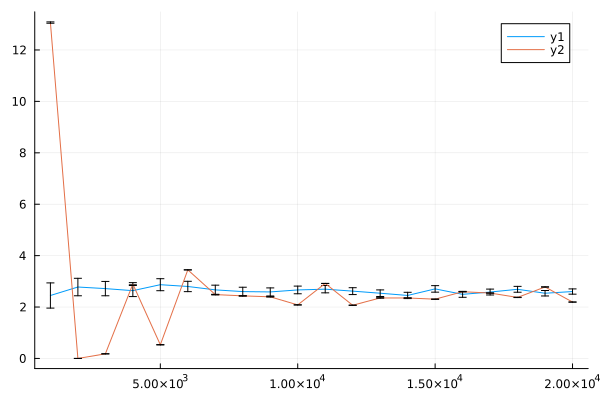

In [21]:
times = [1000*t for t=1:20]

res1_vals = map(t->MC_integrate(h, -π.*[1,1,1],π.*[1,1,1], t), times)
res2_vals = map(t->miser_integrate(h, -π.*[1,1,1],π.*[1,1,1], t, para), times)

plot()
plot!(times, [x.avg for x in res1_vals], yerr=[sqrt(x.var) for x in res1_vals])
plot!(times, [x.avg for x in res2_vals], yerr=[sqrt(x.var) for x in res2_vals])